# Prepocesamiento de dataset.

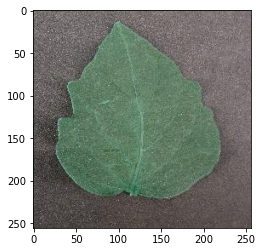

In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import numpy as np
import os
import cv2

DATADIR = "D:\Tesis\Images\leaves by shape"
CATEGORIES = ['Cordate','Lanceolata','Lobed','Oblong','Obovate','Ovate','Round']

#iteramos todas las imagenes
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

# Muestro una imagen

(256, 256, 3)


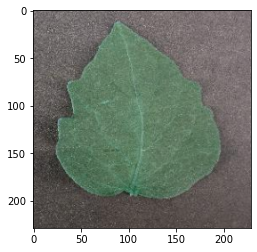

In [2]:
print(img_array.shape)
#cambio de tamaño
IMG_SIZE = 229

hojas_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(hojas_array)
plt.show()

In [3]:
#Defino mi dataset de entrada
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
                hojas_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([hojas_array, class_num])
            except Exeption as e:
                pass

create_training_data()



In [4]:
import random
import pickle

random.shuffle(training_data) #randomiso el dataset para evitar ajustes raros

In [5]:
#Features y labels o inputs y outputs
X = []
y = []


4 [[[59 36 20]
  [60 35 19]
  [59 34 18]
  ...
  [62 36 19]
  [61 35 18]
  [59 33 16]]

 [[58 35 19]
  [59 36 20]
  [59 34 18]
  ...
  [61 35 18]
  [60 34 17]
  [60 34 18]]

 [[58 35 19]
  [57 35 18]
  [57 34 18]
  ...
  [59 35 17]
  [58 32 15]
  [61 35 18]]

 ...

 [[39 25 19]
  [42 26 20]
  [40 24 18]
  ...
  [39 23 17]
  [39 23 17]
  [38 23 17]]

 [[37 22 16]
  [42 26 20]
  [40 24 18]
  ...
  [41 25 20]
  [40 24 18]
  [37 21 15]]

 [[38 23 16]
  [40 24 18]
  [40 24 18]
  ...
  [40 24 18]
  [38 22 16]
  [38 22 16]]]


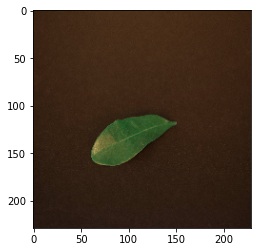

In [6]:
# separamos los datos en X = entrada e y = salida
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X_array = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_array = np.array(y)
#print(X_array[2])
print(y_array[2]),#X_array[2])
plt.imshow(X_array[2])
plt.show()

In [7]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

y_oh = convert_to_one_hot(y_array,7).T
print (y_oh[2])


[0. 0. 0. 0. 1. 0. 0.]


## Guardamos el dataset.
para cargar los datos de pickle ( que quedan en el directorio de jupyter que se esta trabajando)
utilizamos:
## Para X
pickle_in = open("X.pickle", "rb"),

X = pickle.load(pickle_in) <- esta es la variable que tendra los datos
## Para y
pickle_in = open("y.pickle", "rb"),

y = pickle.load(pickle_in)<- esta es la variable que tendra los datos

In [8]:
#guadamos la data.
# guardamos X
pickle_out = open("X.pickle","wb")
pickle.dump(X_array, pickle_out)
pickle_out.close()
#Guardamos Y
pickle_out = open("y.pickle","wb")
pickle.dump(y_oh, pickle_out)
pickle_out.close()

print( "Done")

Done


In [9]:
print(X_array.shape,y_oh.shape)



(4259, 229, 229, 3) (4259, 7)
